# WeatherPy

---

## Starter Code to Generate Random Geographic Coordinates and a List of Cities

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress
from pprint import pprint

# Impor the OpenWeatherMap API key

from api_keys import weather_api_key


# Import citipy to determine the cities based on latitude and longitude


from citipy import citipy

### Generate the Cities List by Using the `citipy` Library

In [2]:
# Empty list for holding the latitude and longitude combinations
lat_lngs = []

# Empty list for holding the cities names
cities = []

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

# Create a set of random lat and lng combinations
lats = np.random.uniform(lat_range[0], lat_range[1], size=1500)
lngs = np.random.uniform(lng_range[0], lng_range[1], size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
print(f"Number of cities in the list: {len(cities)}")

Number of cities in the list: 611


---

## Requirement 1: Create Plots to Showcase the Relationship Between Weather Variables and Latitude

### Use the OpenWeatherMap API to retrieve weather data from the cities list generated in the started code

In [3]:
# Set the API base URL
url = "https://api.openweathermap.org/data/2.5/weather?"
units ="metric"
city_url = f"{url}appid={weather_api_key}&units=metric&q="
city_weather = requests.get(city_url + city).json()
pprint(city_weather)

# Define an empty list to fetch the weather data for each city
city_data = []

# Print to logger
print("Beginning Data Retrieval     ")
print("-----------------------------")

# Create counters
record_count = 1
set_count = 1



{'base': 'stations',
 'clouds': {'all': 100},
 'cod': 200,
 'coord': {'lat': -25.066, 'lon': -130.1015},
 'dt': 1683747978,
 'id': 4030723,
 'main': {'feels_like': 21.76,
          'grnd_level': 1011,
          'humidity': 61,
          'pressure': 1020,
          'sea_level': 1020,
          'temp': 21.92,
          'temp_max': 21.92,
          'temp_min': 21.92},
 'name': 'Adamstown',
 'sys': {'country': 'PN', 'sunrise': 1683731229, 'sunset': 1683770791},
 'timezone': -28800,
 'visibility': 10000,
 'weather': [{'description': 'overcast clouds',
              'icon': '04d',
              'id': 804,
              'main': 'Clouds'}],
 'wind': {'deg': 155, 'gust': 9.79, 'speed': 9.96}}
Beginning Data Retrieval     
-----------------------------


In [4]:


# Loop through all the cities in our list to fetch weather data
for i, city in enumerate(cities):
        
    # Group cities in sets of 50 for logging purposes
    if (i % 50 == 0 and i >= 50):
        set_count += 1
        record_count = 0

    # Create endpoint URL with each city
    city_url = f"{url}appid={weather_api_key}&units=metric&q="
    
    # Log the url, record, and set numbers
    print("Processing Record %s of Set %s | %s" % (record_count, set_count, city))

    # Add 1 to the record count
    record_count += 1

    # Run an API request for each of the cities
    try:
        # Parse the JSON and retrieve data
        city_weather = requests.get(city_url + city).json()
        

        # Parse out latitude, longitude, max temp, humidity, cloudiness, wind speed, country, and date
        city_lat = city_weather["coord"]["lat"]
        city_lng = city_weather["coord"]["lon"]
        city_max_temp = city_weather["main"]["temp_max"]
        city_humidity = city_weather["main"]["temp_min"]
        city_clouds = city_weather["clouds"]["all"]
        city_wind = city_weather["wind"]["speed"]
        city_country = city_weather["name"]
        city_date = city_weather["dt"]

        # Append the City information into city_data list
        city_data.append({"City": city, 
                          "Lat": city_lat, 
                          "Lng": city_lng, 
                          "Max Temp": city_max_temp,
                          "Humidity": city_humidity,
                          "Cloudiness": city_clouds,
                          "Wind Speed": city_wind,
                          "Country": city_country,
                          "Date": city_date})

    # If an error is experienced, skip the city
    except:
        print("City not found. Skipping...")
        pass
              
# Indicate that Data Loading is complete 
print("-----------------------------")
print("Data Retrieval Complete      ")
print("-----------------------------")

Processing Record 1 of Set 1 | adh dhibiyah
City not found. Skipping...
Processing Record 2 of Set 1 | badger
Processing Record 3 of Set 1 | bethel
Processing Record 4 of Set 1 | bilibino
Processing Record 5 of Set 1 | remire-montjoly
Processing Record 6 of Set 1 | papatowai
Processing Record 7 of Set 1 | grytviken
Processing Record 8 of Set 1 | waitangi
Processing Record 9 of Set 1 | weiser
Processing Record 10 of Set 1 | kununurra
Processing Record 11 of Set 1 | margaret river
Processing Record 12 of Set 1 | ushuaia
Processing Record 13 of Set 1 | sergeyevka
Processing Record 14 of Set 1 | bredasdorp
Processing Record 15 of Set 1 | taunsa
Processing Record 16 of Set 1 | port-aux-francais
Processing Record 17 of Set 1 | richmond
Processing Record 18 of Set 1 | atafu village
Processing Record 19 of Set 1 | yellowknife
Processing Record 20 of Set 1 | edinburgh of the seven seas
Processing Record 21 of Set 1 | kapuskasing
Processing Record 22 of Set 1 | blackmans bay
Processing Record 23

In [5]:
# Convert the cities weather data into a Pandas DataFrame
city_data_df = pd.DataFrame(city_data)

# Show Record Count
city_data_df.count()

City          583
Lat           583
Lng           583
Max Temp      583
Humidity      583
Cloudiness    583
Wind Speed    583
Country       583
Date          583
dtype: int64

In [6]:
# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
0,badger,64.8000,-147.5333,12.78,10.93,40,2.06,Badger,1683747982
1,bethel,41.3712,-73.4140,23.34,18.20,0,3.09,Bethel,1683747983
2,bilibino,68.0546,166.4372,-0.74,-0.74,100,2.02,Bilibino,1683747983
3,remire-montjoly,4.9167,-52.2667,27.02,27.02,75,1.03,Rémire-Montjoly,1683747984
4,papatowai,-46.5619,169.4708,6.46,6.46,100,7.51,Papatowai,1683747984


In [7]:
# Export the City_Data into a csv
city_data_df.to_csv("output_data/cities.csv", index_label="City_ID")

In [8]:
# Read saved data
city_data_df = pd.read_csv("output_data/cities.csv", index_col="City_ID")

# Display sample data
city_data_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,12.78,10.93,40,2.06,Badger,1683747982
1,bethel,41.3712,-73.4140,23.34,18.20,0,3.09,Bethel,1683747983
2,bilibino,68.0546,166.4372,-0.74,-0.74,100,2.02,Bilibino,1683747983
3,remire-montjoly,4.9167,-52.2667,27.02,27.02,75,1.03,Rémire-Montjoly,1683747984
4,papatowai,-46.5619,169.4708,6.46,6.46,100,7.51,Papatowai,1683747984


### Create the Scatter Plots Requested

#### Latitude Vs. Temperature

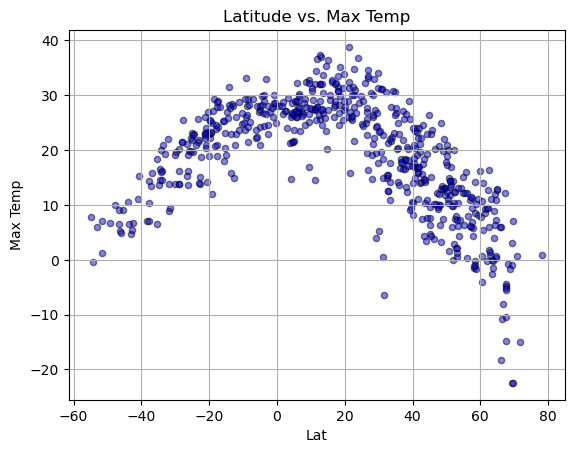

In [9]:
# Build scatter plot for latitude vs. temperature
plt.scatter(city_data_df["Lat"], city_data_df["Max Temp"], marker="o", s=20, color='b', edgecolors='black', alpha=0.5)

# Incorporate the other graph properties
plt.title("Latitude vs. Max Temp")
plt.ylabel("Max Temp")
plt.xlabel("Lat")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig1.png")

# Show plot
plt.show()

#### Latitude Vs. Humidity

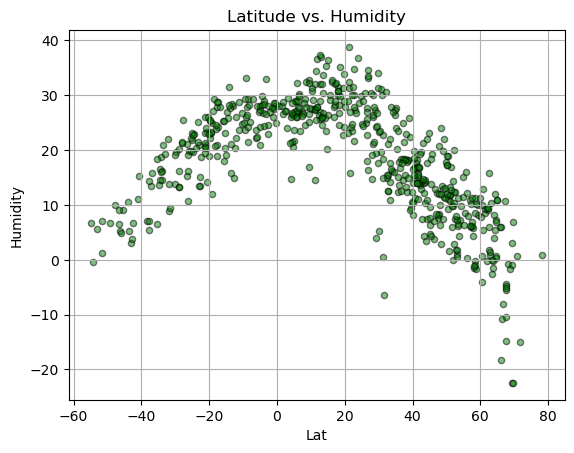

In [10]:
# Build the scatter plots for latitude vs. humidity
plt.scatter(city_data_df["Lat"], city_data_df["Humidity"], marker="o", s=20, color='g', edgecolors='black', alpha=0.5)

# Incorporate the other graph properties
plt.title("Latitude vs. Humidity")
plt.ylabel("Humidity")
plt.xlabel("Lat")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig2.png")

# Show plot
plt.show()

#### Latitude Vs. Cloudiness

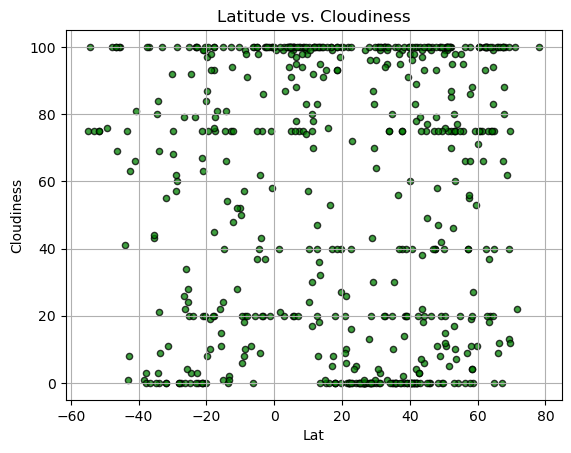

In [11]:
# Build the scatter plots for latitude vs. cloudiness
plt.scatter(city_data_df["Lat"], city_data_df["Cloudiness"], marker="o", s=20, color='g', edgecolors='black', alpha=0.75)

# Incorporate the other graph properties
plt.title("Latitude vs. Cloudiness")
plt.ylabel("Cloudiness")
plt.xlabel("Lat")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig3.png")

# Show plot
plt.show()

#### Latitude vs. Wind Speed Plot

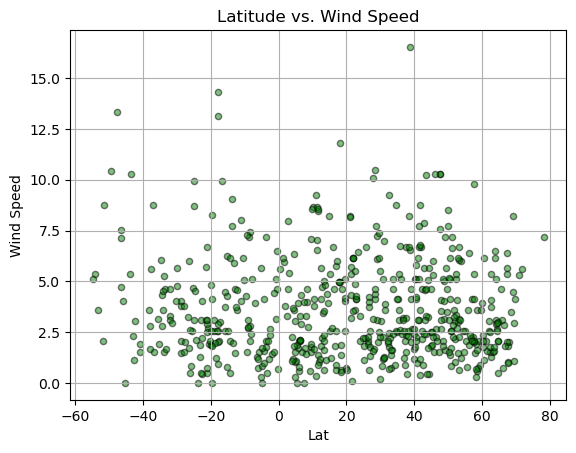

In [12]:
# Build the scatter plots for latitude vs. wind speed
plt.scatter(city_data_df["Lat"], city_data_df["Wind Speed"], marker="o", s=20, color='g', edgecolors='black', alpha=0.5)

# Incorporate the other graph properties
plt.title("Latitude vs. Wind Speed")
plt.ylabel("Wind Speed")
plt.xlabel("Lat")
plt.grid(True)

# Save the figure
plt.savefig("output_data/Fig4.png")

# Show plot
plt.show()

---

## Requirement 2: Compute Linear Regression for Each Relationship


In [16]:
# Define a function to create Linear Regression plots
x_values = city_data_df['Lat']
y_values = city_data_df["Max Temp"]
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
#plt.scatter(x_values,y_values)
# plt.plot(x_values,regress_values,"r-")
# plt.annotate(line_eq,(5.8,0.8),fontsize=15,color="red")
# plt.xlabel('Rooms in House')
# plt.ylabel('Median House Prices ($100,000)')
# plt.show()

In [18]:
# Create a DataFrame with the Northern Hemisphere data (Latitude >= 0)
northern_hemi_df = city_data_df[city_data_df["Lat"]>=0]

# Display sample data
northern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
0,badger,64.8000,-147.5333,12.78,10.93,40,2.06,Badger,1683747982
1,bethel,41.3712,-73.4140,23.34,18.20,0,3.09,Bethel,1683747983
2,bilibino,68.0546,166.4372,-0.74,-0.74,100,2.02,Bilibino,1683747983
3,remire-montjoly,4.9167,-52.2667,27.02,27.02,75,1.03,Rémire-Montjoly,1683747984
7,weiser,44.2510,-116.9693,19.38,17.70,93,0.45,Weiser,1683747986


In [19]:
# Create a DataFrame with the Southern Hemisphere data (Latitude < 0)
southern_hemi_df = city_data_df[city_data_df["Lat"]<0]

# Display sample data
southern_hemi_df.head()

,City,Lat,Lng,Max Temp,Humidity,Cloudiness,Wind Speed,Country,Date
City_ID,,,,,,,,,
4,papatowai,-46.5619,169.4708,6.46,6.46,100,7.51,Papatowai,1683747984
5,grytviken,-54.2811,-36.5092,-0.45,-0.45,100,5.35,Grytviken,1683747985
6,waitangi,-43.9535,-176.5597,10.46,10.46,41,5.36,Waitangi,1683747986
8,kununurra,-15.7667,128.7333,17.99,17.99,15,2.57,Kununurra,1683747987
9,margaret river,-33.9500,115.0667,14.61,14.61,69,5.25,Margaret River,1683747987


###  Temperature vs. Latitude Linear Regression Plot

The r-squared is: 0.6473239158408438


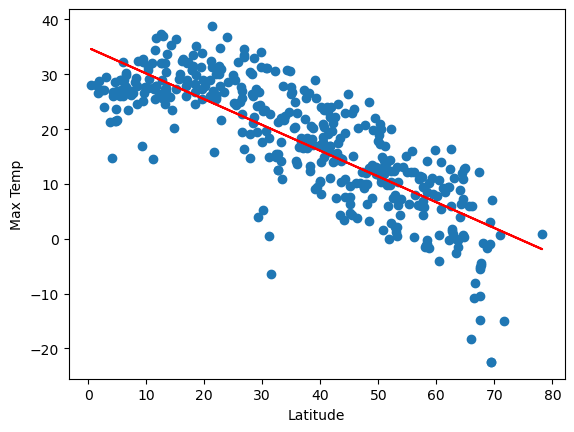

In [20]:
# Linear regression on Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.7275521048849342


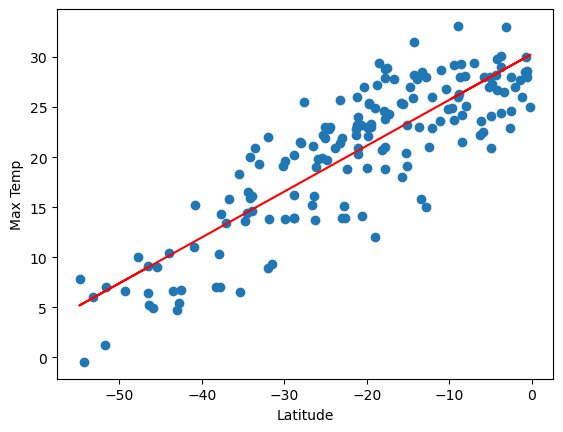

In [21]:
# Linear regression on Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Max Temp']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Max Temp')
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** For the Northern hemisphere, there is a negative coorelation between the latitude of a city and the maximum temperature of that city. The farther north that the city is, the lower the maximum temperature.

For the Sourthern Hemisphere, there is a positive correlation between the latitude of a city and the maximum temperature of that city. The closer to the equator that a city is, the higher it's maximum temperature is. 

### Humidity vs. Latitude Linear Regression Plot

The r-squared is: 0.6838841295813284


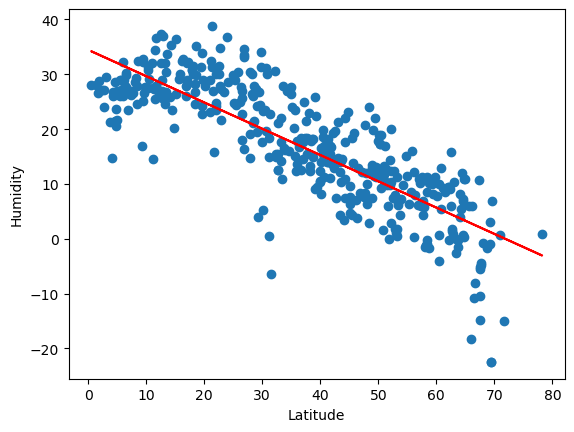

In [22]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.7229728745031974


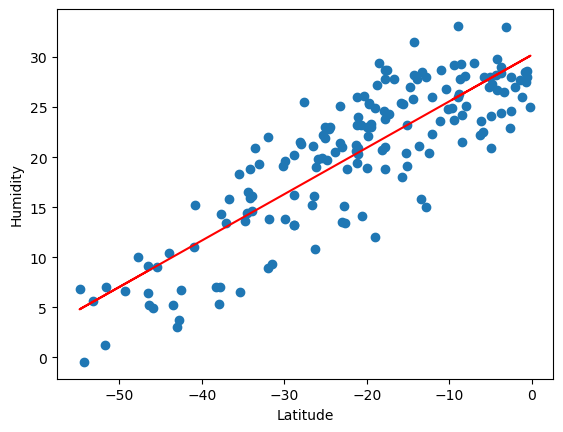

In [24]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Humidity']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Humidity')
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** There is also a negative correlation between latitude and humidity in the Northern Hemisphere. The farther north, the lower the humidity. 

There is a positive correlation between latitude and humidity in the Southern Hemsiphere. The closer to the equator and farther south, the higher the humidity. 

### Cloudiness vs. Latitude Linear Regression Plot

The r-squared is: 0.0013499124145227336


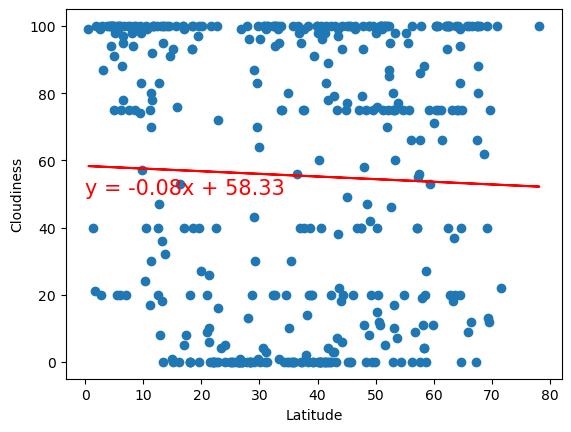

In [26]:
# Northern Hemisphere

x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")
plt.show()


The r-squared is: 0.00027866618181510047


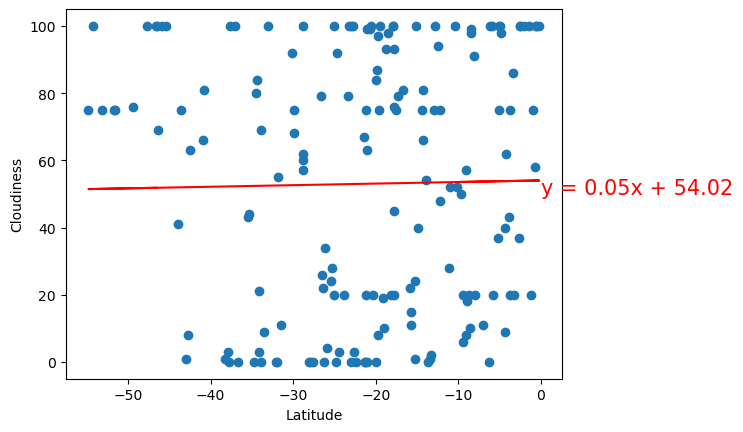

In [27]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Cloudiness']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Cloudiness')
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** There is no real correlation between cloudiness and latitude in either hemisphere. 

### Wind Speed vs. Latitude Linear Regression Plot

The r-squared is: 0.0006472586052876222


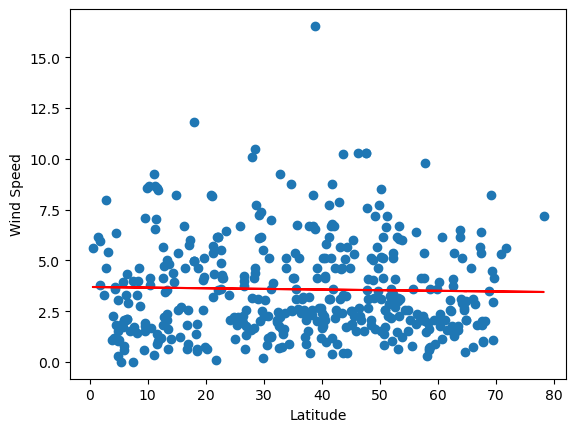

In [28]:
# Northern Hemisphere
x_values = northern_hemi_df['Lat']
y_values = northern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")
plt.show()

The r-squared is: 0.034639243234485105


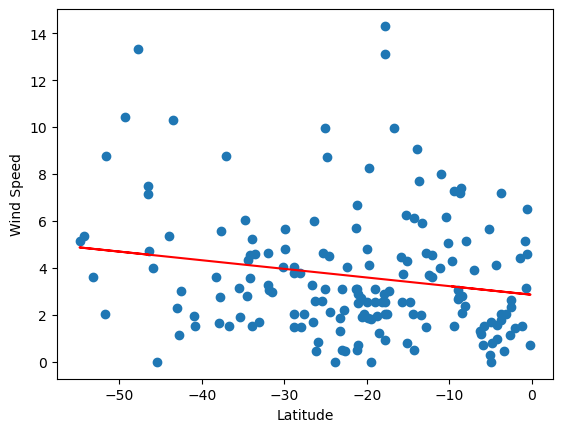

In [29]:
# Southern Hemisphere
x_values = southern_hemi_df['Lat']
y_values = southern_hemi_df['Wind Speed']
(slope, intercept, rvalue, pvalue, stderr) = linregress(x_values, y_values)
regress_values = x_values * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))
plt.scatter(x_values,y_values)
plt.plot(x_values,regress_values,"r-")
plt.annotate(line_eq,(0,50),fontsize=15,color="red")
plt.xlabel('Latitude')
plt.ylabel('Wind Speed')
print(f"The r-squared is: {rvalue**2}")

**Discussion about the linear relationship:** There is no real correlation between wind speed and latitude in the northern hemsisphere. 

There is a slight negative correlation in the southern hemisphere between wind speed and latitude but not enough to come to a clear conclusion. 